In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

In [5]:
df = pd.read_csv("ab_testing_user_engagement_data.csv")
df.head()

,user_id,group,click,session_duration_sec,converted
0,1,A,0,99.172423,1
1,2,B,0,141.703158,0
2,3,A,0,252.024834,0
3,4,A,0,140.586343,0
4,5,A,0,117.185341,0


In [6]:
df.isnull().sum()
df.drop_duplicates(inplace=True)
df['group'].value_counts()


group
A    601
B    599
Name: count, dtype: int64

In [7]:
df.groupby("group").mean()

,user_id,click,session_duration_sec,converted
group,,,,
A,612.948419,0.450915,181.139871,0.158070
B,588.010017,0.535893,203.034013,0.217028


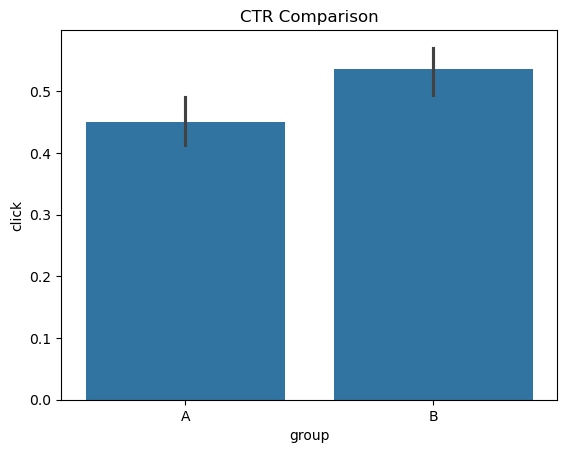

In [8]:
sns.barplot(x="group", y="click", data=df)
plt.title("CTR Comparison")
plt.show()


In [10]:
conv = df.groupby("group")["converted"].sum()
nobs = df.groupby("group")["converted"].count()

stat, pval = proportions_ztest(conv, nobs)
pval


np.float64(0.008887812236614234)

In [13]:
a = df[df["group"]=="A"]["session_duration_sec"]
b = df[df["group"]=="B"]["session_duration_sec"]

t_stat, p_val = ttest_ind(a, b)
p_val


np.float64(1.812162068453458e-10)